In [32]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


In [33]:
df = pd.read_csv("AloNhaDat/AloNhaDat.csv")
df.head()


,city,date,direction,district,floors,front_road,id,length,price,property_legal_document,rooms,size,type_adv,type_real_estate,ward,width
0,Bình Dương,08/11/2021,_,Thành phố Thủ Dầu Một,2,12m,9297601,12m,"3,2 tỷ",---,3,120 m,Cần bán,Nhà mặt tiền,Phường Hiệp An,6m
1,Bình Dương,08/11/2021,_,Thành phố Thuận An,---,10m,9282164,70m,32 tỷ,Sổ hồng/ Sổ đỏ,---,900 m,Cần bán,Nhà mặt tiền,Phường An Phú,17m
2,Bình Dương,08/11/2021,_,Thành phố Dĩ An,1,4m,9163741,12m,"2,55 tỷ",Sổ hồng/ Sổ đỏ,3,60 m,Cần bán,Nhà trong hẻm,Phường Đông Hòa,5m
3,Bình Dương,08/11/2021,_,Thành phố Thủ Dầu Một,18,20m,8729558,30m,680 triệu,Sổ hồng/ Sổ đỏ,18,600 m,Cần bán,"Đất thổ cư, đất ở",Phường Phú Cường,20m
4,Bình Dương,08/11/2021,_,Thành phố Dĩ An,---,20m,9016838,18m,9 tỷ,Sổ hồng/ Sổ đỏ,---,121 m,Cần bán,"Đất thổ cư, đất ở",Phường Tân Đông Hiệp,7m


In [34]:
df.shape


(125496, 16)

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125496 entries, 0 to 125495
Data columns (total 16 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   city                                                      125496 non-null  object
 1   date                                                      125496 non-null  object
 2   direction                                                 125496 non-null  object
 3   district                                                  125496 non-null  object
 4   floors                                                    125496 non-null  object
 5   front_road                                                125496 non-null  object
 6   id                                                        125496 non-null  int64 
 7   length                                                    125496 non-null  object
 8   price         

In [36]:
df.describe(include='all')


,city,date,direction,district,floors,front_road,id,length,price,property_legal_document,rooms,size,type_adv,type_real_estate,ward,width
count,125496,125496,125496,125496,125496,125496,1.254960e+05,125496,125496,125496,125496,125496,125496,125496,125496,125496
unique,4,62,9,46,61,276,NaN,1533,3240,5,134,2746,1,15,662,1102
top,Hồ Chí Minh,07/11/2021,_,Quận Gò Vấp,---,6m,NaN,---,"6,5 tỷ",Sổ hồng/ Sổ đỏ,4,100 m,Cần bán,Nhà trong hẻm,Phường 12,4m
freq,111462,27914,102229,13827,25054,15156,NaN,26297,1595,89009,23628,5331,125496,56155,5511,23845
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.271027e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.327248e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.146580e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.905048e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.767628e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.189656e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
import DataPreProcessor as DPP
p = DPP.DataPreProcessor(df)


In [38]:
print([*p.data.columns])


['city                  ', 'date       ', 'direction ', 'district                   ', 'floors ', 'front_road ', 'id      ', 'length     ', 'price               ', 'property_legal_document ', 'rooms ', 'size          ', 'type_adv ', 'type_real_estate              ', 'ward                                                    ', 'width']


In [39]:
for i in df.columns:
    i, df[i].unique()


('city                  ',
 array(['Bình Dương            ', 'Đồng Nai              ',
        'Hồ Chí Minh           ', 'P6 Quận 3 Hồ Chí Minh '], dtype=object))

('date       ',
 array(['08/11/2021 ', '11/09/2021 ', '16/09/2021 ', '14/09/2021 ',
        '15/09/2021 ', '17/09/2021 ', '12/09/2021 ', '13/09/2021 ',
        '20/09/2021 ', '24/09/2021 ', '26/09/2021 ', '28/09/2021 ',
        '18/09/2021 ', '19/09/2021 ', '25/09/2021 ', '29/09/2021 ',
        '27/09/2021 ', '21/09/2021 ', '22/09/2021 ', '23/09/2021 ',
        '30/09/2021 ', '02/10/2021 ', '06/10/2021 ', '08/10/2021 ',
        '10/10/2021 ', '05/10/2021 ', '04/10/2021 ', '09/10/2021 ',
        '01/10/2021 ', '11/10/2021 ', '07/10/2021 ', '03/10/2021 ',
        '12/10/2021 ', '18/10/2021 ', '20/10/2021 ', '17/10/2021 ',
        '15/10/2021 ', '13/10/2021 ', '19/10/2021 ', '14/10/2021 ',
        '16/10/2021 ', '21/10/2021 ', '22/10/2021 ', '26/10/2021 ',
        '25/10/2021 ', '23/10/2021 ', '27/10/2021 ', '24/10/2021 ',
        '28/10/2021 ', '29/10/2021 ', '30/10/2021 ', '31/10/2021 ',
        '01/11/2021 ', '02/11/2021 ', '03/11/2021 ', '04/11/2021 ',
        '05/11/2021 ', '06/11/20

('direction ',
 array(['_         ', 'Đông Nam  ', 'Tây Nam   ', 'Đông      ',
        'Bắc       ', 'Nam       ', 'Tây Bắc   ', 'Đông Bắc  ',
        'Tây       '], dtype=object))

('district                   ',
 array(['Thành phố Thủ Dầu Một      ', 'Thành phố Thuận An         ',
        'Thành phố Dĩ An            ', 'Huyện Bàu Bàng             ',
        'Thị xã Bến Cát             ', 'Huyện Bắc Tân Uyên         ',
        'Huyện Phú Giáo             ', 'Thị xã Tân Uyên            ',
        'Huyện Dầu Tiếng            ', 'Huyện Long Thành           ',
        'Thành phố Biên Hoà         ', 'Huyện Nhơn Trạch           ',
        'Huyện Định Quán            ', 'Huyện Cẩm Mỹ               ',
        'Thành phố Long Khánh       ', 'Huyện Xuân Lộc             ',
        'Huyện Trảng Bom            ', 'Huyện Vĩnh Cửu             ',
        'Huyện Thống Nhất           ', 'Huyện Tân Phú              ',
        'Thành phố Thủ Đức          ', 'Quận 12                    ',
        'Quận 2                     ', 'Quận Phú Nhuận             ',
        'Quận Tân Bình              ', 'Quận 3                     ',
        'Quận Tân Phú               ', 'Quận 6            

('floors ',
 array(['2      ', '---    ', '1      ', '18     ', '23     ', '4      ',
        '6      ', '3      ', '26     ', '35     ', '10     ', '30     ',
        '15     ', '12     ', '8      ', '40     ', '38     ', '5      ',
        '29     ', '19     ', '31     ', '22     ', '25     ', '9      ',
        '33     ', '17     ', '20     ', '13     ', '24     ', '11     ',
        '14     ', '27     ', '16     ', '28     ', '21     ', '36     ',
        '7      ', '32     ', '34     ', '37     ', '151    ', '50     ',
        '61     ', '39     ', '48     ', '42     ', '44     ', '222    ',
        '75     ', '2000   ', '68     ', '988    ', '333    ', '163    ',
        '45     ', '144    ', '43     ', '91     ', '46     ', '55     ',
        '52     '], dtype=object))

('front_road ',
 array(['12m        ', '10m        ', '4m         ', '20m        ',
        '3m         ', '13m        ', '---        ', '5m         ',
        '48m        ', '16m        ', '8m         ', '25m        ',
        '30m        ', '15m        ', '7m         ', '6m         ',
        '32m        ', '3,5m     ', '22m        ', '50m        ',
        '42m        ', '36m        ', '9m         ', '16mm       ',
        '5mm        ', '26m        ', '4,5m     ', '60m        ',
        '54m        ', '18m        ', '21m        ', '1,5m     ',
        '2,7m     ', '45m        ', '40m        ', '120m       ',
        '24m        ', '0m         ', '14m        ', '80m        ',
        '17m        ', '2m         ', '64m        ', '5,5m     ',
        '6,7m     ', '1m         ', '3,8m     ', '5,1m     ',
        '19m        ', '5-6m       ', '11m        ', '35m        ',
        '62m        ', '63m        ', 'H?mm       ', '28m        ',
        '5,0m     ', '33m        ', '55m        

('id      ',
 array([9297601, 9282164, 9163741, ..., 9334765, 9299991, 9295390],
       dtype=int64))

('length     ',
 array(['12m        ', '70m        ', '30m        ', ..., '13,30m   ',
        '57,5m    ', '367m       '], dtype=object))

('price               ',
 array([' 3,2 tỷ           ', '32 tỷ               ', ' 2,55 tỷ          ',
        ..., ' 6,615 tỷ         ', ' 65,99 tỷ         ',
        ' 9,465 tỷ         '], dtype=object))

('property_legal_document ',
 array(['---                     ', 'Sổ hồng/ Sổ đỏ          ',
        'Giấy tờ hợp lệ          ', 'Giấy phép XD            ',
        'Giấy phép KD            '], dtype=object))

('rooms ',
 array(['3     ', '---   ', '18    ', '24    ', '2     ', '4     ',
        '35    ', '1     ', '30    ', '5     ', '8     ', '6     ',
        '22    ', '12    ', '54    ', '68    ', '36    ', '10    ',
        '7     ', '20    ', '55    ', '14    ', '16    ', '15    ',
        '13    ', '9     ', '25    ', '11    ', '17    ', '32    ',
        '28    ', '21    ', '100   ', '27    ', '95    ', '19    ',
        '43    ', '37    ', '60    ', '40    ', '62    ', '50    ',
        '120   ', '42    ', '33    ', '23    ', '110   ', '29    ',
        '72    ', '45    ', '58    ', '31    ', '192   ', '26    ',
        '44    ', '160   ', '48    ', '65    ', '74    ', '34    ',
        '41    ', '39    ', '80    ', '104   ', '46    ', '51    ',
        '89    ', '84    ', '63    ', '61    ', '56    ', '105   ',
        '71    ', '67    ', '66    ', '70    ', '85    ', '300   ',
        '88    ', '90    ', '52    ', '111   ', '101   ', '150   ',
        '123   ', '373   ', '145   ',

('size          ',
 array(['120 m         ', '900 m         ', '60 m          ', ...,
        '1.131 m       ', '3.217 m       ', '4.273 m       '], dtype=object))

('type_adv ', array(['Cần bán  '], dtype=object))

('type_real_estate              ',
 array(['Nhà mặt tiền                  ', 'Nhà trong hẻm                 ',
        'Đất thổ cư, đất ở           ', 'Căn hộ chung cư               ',
        'Đất nền, liền kề, đất dự án ', 'Biệt thự, nhà liền kề       ',
        'Nhà hàng, khách sạn         ', 'Phòng trọ, nhà trọ          ',
        'Kho, xưởng                  ', 'Đất nông, lâm nghiệp        ',
        'Shop, kiot, quán            ', 'Mặt bằng                      ',
        'Văn phòng                     ', 'Trang trại                    ',
        'Các loại khác                 '], dtype=object))

('ward                                                    ',
 array(['Phường Hiệp An                                          ',
        'Phường An Phú                                           ',
        'Phường Đông Hòa                                         ',
        'Phường Phú Cường                                        ',
        'Phường Tân Đông Hiệp                                    ',
        'Thị trấn Lai Uyên                                       ',
        'Phường Tân Định                                         ',
        'Phường Bình Hòa                                         ',
        'Xã Bình Mỹ                                              ',
        'Thị trấn Phước Vĩnh                                     ',
        'Phường Dĩ An                                            ',
        'Phường Hòa Lợi                                          ',
        'Phường Uyên Hưng                                        ',
        'Xã Vĩnh Tân                                   

('width',
 array(['6m', '17m', '5m', ..., '5,53m', '55,5m', '3,6-10m'], dtype=object))

## Xóa khoảng trắng thừa


In [40]:
# Loại bỏ khoảng trắng thừa để chuẩn hóa tên thuộc tính
# df.columns = [i.strip() for i in df.columns]
# df.columns

# loại bỏ các khoảng trắng dư thừa trong dataframe
# for i in df.columns:
#     if df[i].dtype == int:
#         continue
#     df[i] = [j.strip() for j in df[i]]

# Loại bỏ các khoảng trắng dư thừa trong dataframe
p.remove_excess_whitespace(on_cell=True, on_column_name=True)
p.data.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road', 'id',
       'length', 'price', 'property_legal_document', 'rooms', 'size',
       'type_adv', 'type_real_estate', 'ward', 'width'],
      dtype='object')

In [41]:
df.loc[(df['city'] == 'Đồng Nai' )& (df['date'] == '08/11/2021') &(df['length'] == '93m')]

,city,date,direction,district,floors,front_road,id,length,price,property_legal_document,rooms,size,type_adv,type_real_estate,ward,width
12617,Đồng Nai,08/11/2021,_,Huyện Định Quán,---,8m,9315656,93m,950 triệu,Sổ hồng/ Sổ đỏ,---,11.000 m,Cần bán,"Đất nông, lâm nghiệp",Xã Ngọc Định,110m
12618,Đồng Nai,08/11/2021,_,Huyện Định Quán,---,8m,9315845,93m,"1,05 tỷ",---,---,1.153 m,Cần bán,"Đất nông, lâm nghiệp",Xã Ngọc Định,14m
12624,Đồng Nai,08/11/2021,_,Huyện Định Quán,---,8m,9306083,93m,90 triệu / m,---,---,9.876 m,Cần bán,"Đất nông, lâm nghiệp",Xã Ngọc Định,110m
12629,Đồng Nai,08/11/2021,_,Huyện Định Quán,---,6m,9326305,93m,500 ngàn / m,Sổ hồng/ Sổ đỏ,---,1.005 m,Cần bán,"Đất nông, lâm nghiệp",Xã Phú Ngọc,14m
12800,Đồng Nai,08/11/2021,_,Huyện Trảng Bom,---,8m,9339459,93m,27 tỷ,Sổ hồng/ Sổ đỏ,---,8.564 m,Cần bán,"Kho, xưởng",Thị trấn Trảng Bom,92m


## Điền giá trị bị sai lệch mà có thể dễ dàng điền lại


In [42]:
_ = df.loc[df['city'] == 'P6 Quận 3 Hồ Chí Minh', :]
_


,city,date,direction,district,floors,front_road,id,length,price,property_legal_document,rooms,size,type_adv,type_real_estate,ward,width
47471,P6 Quận 3 Hồ Chí Minh,03/11/2021,_,Mặt tiền Nguyễn Đình Chiểu,8,30m,8503476,25m,170 tỷ,Sổ hồng/ Sổ đỏ,8,200 m,Cần bán,Nhà mặt tiền,,"8,5m"


In [43]:
fill_city = {'city': 'Hồ Chí Minh', 'district': 'Quận 3', 'ward': 'Phường 6'}
idx = _.index[0]
for key, val in fill_city.items():
    df.loc[idx, key] = val


In [44]:
df.loc[idx, :]


city                          Hồ Chí Minh
date                           03/11/2021
direction                               _
district                           Quận 3
floors                                  8
front_road                            30m
id                                8503476
length                                25m
price                              170 tỷ
property_legal_document    Sổ hồng/ Sổ đỏ
rooms                                   8
size                                200 m
type_adv                          Cần bán
type_real_estate             Nhà mặt tiền
ward                             Phường 6
width                                8,5m
Name: 47471, dtype: object

## Xóa các thuộc tính chỉ có 1 giá trị hoặc không có giá trị


In [45]:
# df['type_adv'].unique()
# p.drop_column('type_adv')

# Xóa bỏ thuộc tính type_adv
p.drop_column('type_adv')


In [46]:
p.drop_column('id')

## Thay thế các dấu thành giá trị NaN để chuẩn hóa


Các thuộc tính như 'direction', 'floors','property*legal_document', 'rooms', 'size', 'width' chỉ có các dấu '*', '-' nên sẽ được ưu tiên xử lý trước


In [47]:
# df['direction'].replace(r'[_]', np.nan, inplace=True, regex=True)
# df['floors'].replace(r'[-]', np.nan, inplace=True, regex=True)
# df['property_legal_document'].replace(r'[-]', np.nan, inplace=True, regex=True)
# df['rooms'].replace(r'[-]', np.nan, inplace=True, regex=True)
# df['length'].replace(r'[-]', np.nan, inplace=True, regex=True)

# Thay thế dấu "_" hoặc "-" bằng np.nan để dễ chuẩn hóa dữ liệu
p.replace_value(features=['direction', 'floors', 'property_legal_document', 'rooms', 'length'],
                value_to_replaces=['_', '-', '-', '-', '-'],
                replace_values=[np.nan, np.nan, np.nan, np.nan, np.nan])


In [ ]:
df['floors'] = df['floors'].apply(DPP.convertNum2Int,convert_dtype=False)

In [18]:
df['floors'].describe()

count     100442
unique        60
top            2
freq       24869
Name: floors, dtype: int64

In [19]:
df['rooms'] = df['rooms'].apply(DPP.convertNum2Int,convert_dtype=False)

In [20]:
df['rooms'].describe()

count     102852
unique       133
top            4
freq       23628
Name: rooms, dtype: int64

## Xử lý các thuộc tính chứa đơn vị đo


In [21]:
'width', 'front_road', 'length', 'size', 'price'


('width', 'front_road', 'length', 'size', 'price')

In [22]:
p.replace_value(features=['width', 'front_road', 'length', 'size', 'price'], value_to_replaces=
                ['.']*5, replace_values=['']*5)


### width


In [23]:
# Kiểm tra đơn vị của thuộc tính width
width_unit = p.check_unique_unit('width')
print(width_unit)


['m', 'Om', 'lm', 'mm', ['tu', 'y', 'canm'], 'am', 'ìnhm', ['nhà', 'm'], 'xm', ['m', 'N', 'h', 'u', 'mm'], 'Ãm', ['l', 'm']]


In [24]:
# Gom nhóm các giá trị có cùng đơn vị
width_val = {}
for i in width_unit:
    value = p.check_value_unit(i, 'width')
    width_val[str(i)] = value
width_val


{'m': {0: '6m',
  1: '17m',
  2: '5m',
  3: '20m',
  4: '7m',
  5: '4m',
  6: '5m',
  7: '10m',
  11: '7m',
  12: '4m',
  13: '4m',
  14: '5m',
  15: '5m',
  16: '5m',
  17: '5m',
  18: '5m',
  19: '5m',
  20: '35m',
  21: '5m',
  22: '10m',
  23: '10m',
  24: '5m',
  25: '5m',
  26: '6m',
  27: '10m',
  28: '5m',
  29: '5m',
  30: '72m',
  31: '4m',
  32: '5m',
  33: '20m',
  34: '4m',
  35: '5m',
  36: '10m',
  37: '10m',
  38: '5m',
  39: '6m',
  40: '5m',
  41: '5m',
  42: '4m',
  43: '4m',
  44: '5m',
  45: '4m',
  46: '4m',
  47: '5m',
  48: '5m',
  49: '4m',
  50: '5m',
  51: '6,5m',
  52: '4m',
  53: '5m',
  54: '5m',
  55: '6m',
  56: '4m',
  57: '5,2m',
  58: '4,5m',
  59: '4m',
  60: '4,2m',
  61: '4m',
  62: '4m',
  63: '4m',
  64: '5m',
  65: '4m',
  66: '4m',
  67: '4m',
  68: '4m',
  69: '4m',
  70: '4m',
  71: '4m',
  72: '4m',
  73: '5m',
  74: '4m',
  75: '10m',
  76: '4m',
  77: '4m',
  78: '5m',
  79: '4m',
  80: '4,5m',
  81: '4,2m',
  82: '6m',
  83: '5m',
  84: '

In [25]:
# Xử lý các giá trị có cùng đơn vị
untreated_width, handle_width = DPP.handle_value_with_unit(width_val)


In [26]:
# Xem xét sự tương đồng của các giá trị trước và sau xử lý
for i in width_unit:
    i, width_val[str(i)], handle_width[str(i)]


('m',
 {0: '6m',
  1: '17m',
  2: '5m',
  3: '20m',
  4: '7m',
  5: '4m',
  6: '5m',
  7: '10m',
  11: '7m',
  12: '4m',
  13: '4m',
  14: '5m',
  15: '5m',
  16: '5m',
  17: '5m',
  18: '5m',
  19: '5m',
  20: '35m',
  21: '5m',
  22: '10m',
  23: '10m',
  24: '5m',
  25: '5m',
  26: '6m',
  27: '10m',
  28: '5m',
  29: '5m',
  30: '72m',
  31: '4m',
  32: '5m',
  33: '20m',
  34: '4m',
  35: '5m',
  36: '10m',
  37: '10m',
  38: '5m',
  39: '6m',
  40: '5m',
  41: '5m',
  42: '4m',
  43: '4m',
  44: '5m',
  45: '4m',
  46: '4m',
  47: '5m',
  48: '5m',
  49: '4m',
  50: '5m',
  51: '6,5m',
  52: '4m',
  53: '5m',
  54: '5m',
  55: '6m',
  56: '4m',
  57: '5,2m',
  58: '4,5m',
  59: '4m',
  60: '4,2m',
  61: '4m',
  62: '4m',
  63: '4m',
  64: '5m',
  65: '4m',
  66: '4m',
  67: '4m',
  68: '4m',
  69: '4m',
  70: '4m',
  71: '4m',
  72: '4m',
  73: '5m',
  74: '4m',
  75: '10m',
  76: '4m',
  77: '4m',
  78: '5m',
  79: '4m',
  80: '4,5m',
  81: '4,2m',
  82: '6m',
  83: '5m',
  84: 

('Om', {475: '1Om', 79654: '1Om'}, {475: 1.0, 79654: 1.0})

('lm', {2495: '4,5lm'}, {2495: 4.5})

('mm',
 {7888: '60mm',
  17088: '5mm',
  17587: '17mm',
  35686: '27mm',
  52806: '4mm',
  72581: '4m N? h?u 6,35mm',
  76036: '5,43mm',
  92529: '5,6mm',
  101619: '4,8mm',
  113640: '4,8mm'},
 {7888: 60.0,
  17088: 5.0,
  17587: 17.0,
  35686: 27.0,
  52806: 4.0,
  72581: [4.0, 6.35],
  76036: 5.43,
  92529: 5.6,
  101619: 4.8,
  113640: 4.8})

(['tu', 'y', 'canm'], {17171: 'tu`y canm'}, {17171: nan})

('am', {33806: 'am'}, {33806: nan})

('ìnhm', {44997: '4,2ìnhm'}, {44997: 4.2})

(['nhà', 'm'], {46106: '4,2(nhà,m'}, {46106: 4.2})

('xm', {46156: '4,5xm'}, {46156: 4.5})

(['m', 'N', 'h', 'u', 'mm'], {72581: '4m N? h?u 6,35mm'}, {72581: [4.0, 6.35]})

('Ãm', {115762: 'Ãm'}, {115762: nan})

(['l', 'm'], {2495: '4,5lm', 115916: '4l,2m'}, {2495: 4.5, 115916: [4.0, 0.2]})

In [27]:
# Chuyển giá trị 1O => 10
fill10m = {475: 10.0, 79654: 10.0}
handle_width[width_unit[1]].update(fill10m)


In [28]:
# Biến đổi 4l,2m thành 4.2 ở dòng index 115916
handle_width[str(['l', 'm'])][115916] = sum(
    handle_width[str(['l', 'm'])][115916])


In [29]:
# Các giá trị chưa xử lý được
untreated_width


{'m': {12484: ',7,1m',
  20806: '4,,5m',
  27345: '4,,15m',
  30698: '4,3,m',
  50930: '3,,5m',
  60434: ',3,5m',
  61436: ',6,6m',
  67983: '4,5,m',
  69417: '4,,6m',
  71635: '4,6,m',
  73622: ',3,6m',
  83073: '4,,9m',
  83673: '10,,5m',
  88767: '4,9,8m',
  94461: '3,5,m',
  96936: '4,,2m',
  102166: '5,5,m',
  110266: '5,5,m',
  116913: '5,5,m',
  116945: '4,,2m',
  118432: '4,9,8m',
  120163: '5,5,m',
  122785: '4,,9m'}}

In [30]:
# Biến đổi các sô liệu chưa được xử lý về dạng chuẩn
for i, val in untreated_width['m'].items():
    number = re.findall(r'[0-9]', val)
    count = 0
    temp = 0
    for num in number:
        temp += int(num)/(10**count)
        count += 1

    untreated_width['m'][i] = round(temp, 5)


In [31]:
untreated_width['m']

{12484: 7.1,
 20806: 4.5,
 27345: 4.15,
 30698: 4.3,
 50930: 3.5,
 60434: 3.5,
 61436: 6.6,
 67983: 4.5,
 69417: 4.6,
 71635: 4.6,
 73622: 3.6,
 83073: 4.9,
 83673: 1.05,
 88767: 4.98,
 94461: 3.5,
 96936: 4.2,
 102166: 5.5,
 110266: 5.5,
 116913: 5.5,
 116945: 4.2,
 118432: 4.98,
 120163: 5.5,
 122785: 4.9}

In [32]:
# update các số liệu đã qua xử lý
handle_width['m'].update(untreated_width['m'])


In [33]:
handle_width

{'m': {0: 6.0,
  1: 17.0,
  2: 5.0,
  3: 20.0,
  4: 7.0,
  5: 4.0,
  6: 5.0,
  7: 10.0,
  11: 7.0,
  12: 4.0,
  13: 4.0,
  14: 5.0,
  15: 5.0,
  16: 5.0,
  17: 5.0,
  18: 5.0,
  19: 5.0,
  20: 35.0,
  21: 5.0,
  22: 10.0,
  23: 10.0,
  24: 5.0,
  25: 5.0,
  26: 6.0,
  27: 10.0,
  28: 5.0,
  29: 5.0,
  30: 72.0,
  31: 4.0,
  32: 5.0,
  33: 20.0,
  34: 4.0,
  35: 5.0,
  36: 10.0,
  37: 10.0,
  38: 5.0,
  39: 6.0,
  40: 5.0,
  41: 5.0,
  42: 4.0,
  43: 4.0,
  44: 5.0,
  45: 4.0,
  46: 4.0,
  47: 5.0,
  48: 5.0,
  49: 4.0,
  50: 5.0,
  51: 6.5,
  52: 4.0,
  53: 5.0,
  54: 5.0,
  55: 6.0,
  56: 4.0,
  57: 5.2,
  58: 4.5,
  59: 4.0,
  60: 4.2,
  61: 4.0,
  62: 4.0,
  63: 4.0,
  64: 5.0,
  65: 4.0,
  66: 4.0,
  67: 4.0,
  68: 4.0,
  69: 4.0,
  70: 4.0,
  71: 4.0,
  72: 4.0,
  73: 5.0,
  74: 4.0,
  75: 10.0,
  76: 4.0,
  77: 4.0,
  78: 5.0,
  79: 4.0,
  80: 4.5,
  81: 4.2,
  82: 6.0,
  83: 5.0,
  84: 10.0,
  85: 4.0,
  86: 4.0,
  87: 5.3,
  88: 6.0,
  89: 5.0,
  90: 4.0,
  91: 8.5,
  92: 8.0,


In [34]:
# Cập nhật giá trị vào dataframe
for unit in width_unit:
    for i, val in handle_width[str(unit)].items():
        if type(val) == list:
            print(i, val,end="")
            val = round(np.mean(val),5)
            print(f" => {val}")
        df.at[i, 'width'] = val


951 [4.0, 5.0] => 4.5
5002 [8.0, 9.0] => 8.5
10026 [7.0, 2.0] => 4.5
15981 [3.8, 4.35] => 4.075
16227 [3.93, 4.6] => 4.265
16418 [4.0, 16.0] => 10.0
16976 [3.8, 4.5] => 4.15
17524 [3.9, 5.2] => 4.55
17570 [5.0, 7.8] => 6.4
17758 [4.0, 6.0] => 5.0
18230 [4.0, 6.4] => 5.2
18300 [4.8, 5.2] => 5.0
18693 [7.7, 22.0] => 14.85
18824 [4.0, 8.0] => 6.0
19123 [3.1, 8.6] => 5.85
20027 [4.8, 8.5] => 6.65
20400 [4.0, 4.1] => 4.05
20572 [3.5, 6.0] => 4.75
20763 [5.8, 7.0] => 6.4
21343 [4.2, 4.5] => 4.35
22034 [3.3, 4.2] => 3.75
22206 [2.0, 4.0] => 3.0
24914 [4.2, 4.444] => 4.322
25030 [5.2, 6.4] => 5.8
25830 [3.8, 6.0] => 4.9
28431 [4.3, 4.8] => 4.55
28439 [3.8, 6.8] => 5.3
28839 [4.0, 1.0] => 2.5
30999 [4.2, 6.0] => 5.1
31016 [3.1, 5.0] => 4.05
31180 [3.4, 4.0] => 3.7
31229 [4.5, 5.2] => 4.85
31266 [3.2, 6.8] => 5.0
31294 [3.2, 6.8] => 5.0
31329 [4.2, 4.3] => 4.25
31603 [9.0, 9.2] => 9.1
31609 [3.8, 6.0] => 4.9
31851 [4.3, 4.8] => 4.55
32889 [4.0, 4.9] => 4.45
33014 [4.5, 5.2] => 4.85
33067 [3.4, 4

In [35]:
p.replace_value(features=['width'], value_to_replaces=[
                '-'], replace_values=[np.nan])


In [36]:
df['width'] = df['width'].apply(lambda x: round(x,5) if type(x)==list else x)


In [37]:
df['width'].describe()

count    102302.000000
mean          7.850374
std          22.624266
min           0.000000
25%           4.000000
50%           5.000000
75%           6.800000
max        3300.000000
Name: width, dtype: float64

### length


In [38]:
# Kiểm tra đơn vị của thuộc tính length
length_unit = p.check_unique_unit('length')
print(length_unit)


['m', 'mm', 'pm', ['tu', 'y', 'canm'], 'um', 'rm', ['G', 'nm']]


In [39]:
length_val = {}
for i in length_unit:
    value = p.check_value_unit(i, 'length')
    length_val[str(i)] = value
length_val


{'m': {0: '12m',
  1: '70m',
  2: '12m',
  3: '30m',
  4: '18m',
  5: '10m',
  7: '30m',
  11: '12m',
  12: '14m',
  13: '17m',
  14: '18m',
  15: '20m',
  16: '24m',
  17: '20m',
  18: '18m',
  19: '25m',
  20: '40m',
  21: '16m',
  22: '29m',
  23: '22m',
  24: '36m',
  25: '20m',
  26: '30m',
  27: '5m',
  28: '18m',
  29: '12m',
  30: '4m',
  31: '30m',
  32: '20m',
  33: '33m',
  34: '15m',
  35: '40m',
  36: '50m',
  37: '50m',
  38: '40m',
  39: '19m',
  40: '50m',
  41: '10m',
  42: '16m',
  43: '20m',
  44: '27m',
  45: '18m',
  46: '20m',
  47: '13m',
  48: '33m',
  49: '12,5m',
  50: '20,5m',
  51: '6,5m',
  52: '17m',
  53: '20m',
  54: '13m',
  55: '19m',
  56: '18m',
  57: '18m',
  58: '18m',
  59: '15m',
  60: '16m',
  61: '15m',
  62: '12,5m',
  63: '17m',
  64: '26m',
  65: '10m',
  66: '19m',
  67: '17m',
  68: '15m',
  69: '16m',
  70: '16,5m',
  71: '10,5m',
  72: '11m',
  73: '20m',
  74: '15m',
  75: '20m',
  76: '8m',
  77: '9m',
  78: '14m',
  79: '18m',
  80: '

In [40]:
untreated_length, handle_length = DPP.handle_value_with_unit(length_val)


In [41]:
for i in length_unit:
    i, length_val[str(i)], handle_length[str(i)]


('m',
 {0: '12m',
  1: '70m',
  2: '12m',
  3: '30m',
  4: '18m',
  5: '10m',
  7: '30m',
  11: '12m',
  12: '14m',
  13: '17m',
  14: '18m',
  15: '20m',
  16: '24m',
  17: '20m',
  18: '18m',
  19: '25m',
  20: '40m',
  21: '16m',
  22: '29m',
  23: '22m',
  24: '36m',
  25: '20m',
  26: '30m',
  27: '5m',
  28: '18m',
  29: '12m',
  30: '4m',
  31: '30m',
  32: '20m',
  33: '33m',
  34: '15m',
  35: '40m',
  36: '50m',
  37: '50m',
  38: '40m',
  39: '19m',
  40: '50m',
  41: '10m',
  42: '16m',
  43: '20m',
  44: '27m',
  45: '18m',
  46: '20m',
  47: '13m',
  48: '33m',
  49: '12,5m',
  50: '20,5m',
  51: '6,5m',
  52: '17m',
  53: '20m',
  54: '13m',
  55: '19m',
  56: '18m',
  57: '18m',
  58: '18m',
  59: '15m',
  60: '16m',
  61: '15m',
  62: '12,5m',
  63: '17m',
  64: '26m',
  65: '10m',
  66: '19m',
  67: '17m',
  68: '15m',
  69: '16m',
  70: '16,5m',
  71: '10,5m',
  72: '11m',
  73: '20m',
  74: '15m',
  75: '20m',
  76: '8m',
  77: '9m',
  78: '14m',
  79: '18m',
  80: 

('mm',
 {4921: '23mm',
  10026: '14mm',
  13869: '350mm',
  35686: '39mm',
  91182: '14mm',
  122897: '22mm'},
 {4921: 23.0,
  10026: 14.0,
  13869: 350.0,
  35686: 39.0,
  91182: 14.0,
  122897: 22.0})

('pm',
 {11298: '7pm', 69984: '1pm', 117345: '10pm'},
 {11298: 7.0, 69984: 1.0, 117345: 10.0})

(['tu', 'y', 'canm'], {17171: 'tu`y canm'}, {17171: nan})

('um', {21664: '1um', 21680: '3um'}, {21664: 1.0, 21680: 3.0})

('rm', {99913: '2rm'}, {99913: 2.0})

(['G', 'nm'], {103503: 'G?nm'}, {103503: nan})

In [42]:
untreated_length


{'m': {41552: ',6,3m',
  110182: '13,5,m',
  110189: '14,5,m',
  110243: '19,5,m',
  110267: '5,6,m',
  110270: '16,5,m',
  110289: '17,5,m',
  110744: ',6,3m'}}

In [43]:
# Biến đổi các sô liệu chưa được xử lý về dạng chuẩn
for i, val in untreated_length['m'].items():
    number = re.findall(r'[0-9]', val)
    count = 0
    temp = 0
    for num in number:
        temp += int(num)/(10**count)
        count += 1

    untreated_length['m'][i] = round(temp, 5)


In [44]:
# update các số liệu đã qua xử lý
handle_length['m'].update(untreated_length['m'])


In [45]:
for unit in length_unit:
    for i, val in handle_length[str(unit)].items():
        if type(val) == list:
            print(i, val,end="")
            val = round(np.mean(val),5)
            print(f" => {val}")
        df.at[i, 'length'] = val


5522 [75.0, 65.0] => 70.0
11669 [5.0, 29.0] => 17.0
59068 [7.0, 5.0] => 6.0
65578 [10.0, 63.0] => 36.5
85674 [22.5, 2.0] => 12.25
90935 [] => nan
95722 [15.0, 7.0] => 11.0


In [46]:
p.replace_value(features=['length'], value_to_replaces=[
                '-'], replace_values=[np.nan])


In [47]:
df['length'] = df['length'].apply(lambda x: round(x,5) if type(x)==list else x)


In [48]:
df['length'].describe()


count    99193.000000
mean        21.617746
std         61.564585
min          0.000000
25%         12.500000
50%         17.000000
75%         22.000000
max      10000.000000
Name: length, dtype: float64

### front_road


In [49]:
# Kiểm tra đơn vị của thuộc tính front_road
front_road_unit = p.check_unique_unit('front_road')
print(front_road_unit)


['m', 'mm', ['H', 'mm'], 'QLm', 'qm', 'Xem', 'im', 'fm', 'Im', 'Mm', 'xem', 'am', 'ôm', 'Nhàm', 'Qpm', 'Aim', 'gaym', 'wm', 'aâm']


In [50]:
front_road_val = {}
for i in front_road_unit:
    value = p.check_value_unit(i, 'front_road')
    front_road_val[str(i)] = value
front_road_val


{'m': {0: '12m',
  1: '10m',
  2: '4m',
  3: '20m',
  4: '20m',
  5: '3m',
  6: '13m',
  7: '20m',
  9: '13m',
  10: '5m',
  11: '4m',
  12: '4m',
  13: '4m',
  14: '13m',
  15: '13m',
  16: '48m',
  17: '13m',
  18: '13m',
  19: '16m',
  20: '5m',
  21: '13m',
  22: '12m',
  23: '8m',
  24: '25m',
  25: '13m',
  26: '16m',
  27: '5m',
  28: '25m',
  29: '8m',
  30: '10m',
  31: '30m',
  32: '15m',
  33: '10m',
  34: '7m',
  35: '12m',
  36: '10m',
  37: '10m',
  38: '12m',
  39: '10m',
  40: '10m',
  41: '5m',
  42: '5m',
  43: '6m',
  44: '6m',
  45: '12m',
  46: '8m',
  47: '6m',
  48: '10m',
  49: '5m',
  50: '32m',
  51: '3,5m',
  52: '5m',
  53: '6m',
  54: '8m',
  55: '10m',
  56: '8m',
  57: '8m',
  58: '6m',
  59: '4m',
  60: '5m',
  61: '5m',
  62: '5m',
  63: '5m',
  64: '8m',
  65: '3m',
  66: '12m',
  67: '8m',
  68: '4m',
  69: '5m',
  70: '6m',
  71: '4m',
  72: '4m',
  73: '10m',
  74: '3m',
  75: '16m',
  76: '4m',
  77: '3m',
  78: '6m',
  79: '10m',
  80: '16m',
  81

In [51]:
untreated_front_road, handle_front_road = DPP.handle_value_with_unit(
    front_road_val)


In [52]:
for i in front_road_unit:
    i, front_road_val[str(i)], handle_front_road[str(i)]


('m',
 {0: '12m',
  1: '10m',
  2: '4m',
  3: '20m',
  4: '20m',
  5: '3m',
  6: '13m',
  7: '20m',
  9: '13m',
  10: '5m',
  11: '4m',
  12: '4m',
  13: '4m',
  14: '13m',
  15: '13m',
  16: '48m',
  17: '13m',
  18: '13m',
  19: '16m',
  20: '5m',
  21: '13m',
  22: '12m',
  23: '8m',
  24: '25m',
  25: '13m',
  26: '16m',
  27: '5m',
  28: '25m',
  29: '8m',
  30: '10m',
  31: '30m',
  32: '15m',
  33: '10m',
  34: '7m',
  35: '12m',
  36: '10m',
  37: '10m',
  38: '12m',
  39: '10m',
  40: '10m',
  41: '5m',
  42: '5m',
  43: '6m',
  44: '6m',
  45: '12m',
  46: '8m',
  47: '6m',
  48: '10m',
  49: '5m',
  50: '32m',
  51: '3,5m',
  52: '5m',
  53: '6m',
  54: '8m',
  55: '10m',
  56: '8m',
  57: '8m',
  58: '6m',
  59: '4m',
  60: '5m',
  61: '5m',
  62: '5m',
  63: '5m',
  64: '8m',
  65: '3m',
  66: '12m',
  67: '8m',
  68: '4m',
  69: '5m',
  70: '6m',
  71: '4m',
  72: '4m',
  73: '10m',
  74: '3m',
  75: '16m',
  76: '4m',
  77: '3m',
  78: '6m',
  79: '10m',
  80: '16m',
  8

('mm',
 {193: '16mm',
  201: '5mm',
  1500: 'H?mm',
  2678: '5mm',
  3205: '42mm',
  3210: '42mm',
  3501: '13mm',
  3505: '13mm',
  3510: '13mm',
  3518: '13mm',
  5112: '8mm',
  5522: '24mm',
  5587: '24mm',
  5588: '24mm',
  6565: '7mm',
  7888: '7mm',
  8357: '4mm',
  8766: '6mm',
  11310: '6mm',
  12754: '6mm',
  12758: '18mm',
  12780: '6mm',
  12804: '8mm',
  14321: '6mm',
  15196: '7mm',
  17895: '6mm',
  17913: '4mm',
  18318: '6mm',
  18819: '5mm',
  19424: '6mm',
  19754: '12mm',
  19817: '4mm',
  20128: '10mm',
  20144: '6mm',
  20743: '8mm',
  20927: '6mm',
  21736: '12mm',
  21968: '4mm',
  23008: '10mm',
  23416: '10mm',
  25277: '4mm',
  27487: '7mm',
  27922: '16Mm',
  27996: '6mm',
  28213: '4mm',
  28393: '6mm',
  29454: '3mm',
  29700: '6mm',
  29893: '6mm',
  30438: '3mm',
  31244: '3mm',
  31650: '12mm',
  32308: '7mm',
  33438: '4mm',
  34052: '9mm',
  34795: '6mm',
  35510: '20mm',
  35801: '18mm',
  35874: '12mm',
  39922: '5mm',
  40752: '12mm',
  40827: '16mm

(['H', 'mm'], {1500: 'H?mm'}, {1500: nan})

('QLm', {4459: 'QLm'}, {4459: nan})

('qm', {7470: '5qm'}, {7470: 5.0})

('Xem',
 {10635: 'Xem', 32757: 'xem', 43916: 'xem'},
 {10635: nan, 32757: nan, 43916: nan})

('im',
 {16418: '8im', 22589: 'Im', 28862: '6im', 64479: 'Aim'},
 {16418: 8.0, 22589: nan, 28862: 6.0, 64479: nan})

('fm', {18274: '3fm'}, {18274: 3.0})

('Im',
 {16418: '8im', 22589: 'Im', 28862: '6im', 64479: 'Aim'},
 {16418: 8.0, 22589: nan, 28862: 6.0, 64479: nan})

('Mm',
 {193: '16mm',
  201: '5mm',
  1500: 'H?mm',
  2678: '5mm',
  3205: '42mm',
  3210: '42mm',
  3501: '13mm',
  3505: '13mm',
  3510: '13mm',
  3518: '13mm',
  5112: '8mm',
  5522: '24mm',
  5587: '24mm',
  5588: '24mm',
  6565: '7mm',
  7888: '7mm',
  8357: '4mm',
  8766: '6mm',
  11310: '6mm',
  12754: '6mm',
  12758: '18mm',
  12780: '6mm',
  12804: '8mm',
  14321: '6mm',
  15196: '7mm',
  17895: '6mm',
  17913: '4mm',
  18318: '6mm',
  18819: '5mm',
  19424: '6mm',
  19754: '12mm',
  19817: '4mm',
  20128: '10mm',
  20144: '6mm',
  20743: '8mm',
  20927: '6mm',
  21736: '12mm',
  21968: '4mm',
  23008: '10mm',
  23416: '10mm',
  25277: '4mm',
  27487: '7mm',
  27922: '16Mm',
  27996: '6mm',
  28213: '4mm',
  28393: '6mm',
  29454: '3mm',
  29700: '6mm',
  29893: '6mm',
  30438: '3mm',
  31244: '3mm',
  31650: '12mm',
  32308: '7mm',
  33438: '4mm',
  34052: '9mm',
  34795: '6mm',
  35510: '20mm',
  35801: '18mm',
  35874: '12mm',
  39922: '5mm',
  40752: '12mm',
  40827: '16mm

('xem',
 {10635: 'Xem', 32757: 'xem', 43916: 'xem'},
 {10635: nan, 32757: nan, 43916: nan})

('am', {42285: '12am'}, {42285: 12.0})

('ôm', {45851: 'ôm'}, {45851: nan})

('Nhàm', {64263: 'Nhàm', 117401: 'Nhàm'}, {64263: nan, 117401: nan})

('Qpm', {64463: 'Qpm'}, {64463: nan})

('Aim', {64479: 'Aim'}, {64479: nan})

('gaym', {76124: 'gaym'}, {76124: nan})

('wm', {99926: '1wm'}, {99926: 1.0})

('aâm', {112129: 'aâm'}, {112129: nan})

In [53]:
untreated_front_road


{'m': {4251: '5,,m'}}

In [54]:
# Biến đổi các sô liệu chưa được xử lý về dạng chuẩn
for i, val in untreated_front_road['m'].items():
    number = re.findall(r'[0-9]', val)
    count = 0
    temp = 0
    for num in number:
        temp += int(num)/(10**count)
        count += 1

    untreated_front_road['m'][i] = round(temp, 5)


In [55]:
# update các số liệu đã qua xử lý
handle_front_road['m'].update(untreated_front_road['m'])


In [56]:
for unit in front_road_unit:
    for i, val in handle_front_road[str(unit)].items():
        if type(val) == list:
            print(i, val,end="")
            val = np.mean(val)
            print(f" => {val}")
        df.at[i, 'front_road'] = val


1084 [5.0, 6.0] => 5.5
5332 [6.0, 8.0] => 7.0
17345 [5.0, 6.0] => 5.5
24276 [2.0, 3.0] => 2.5
26887 [6.0, 5.0] => 5.5
31016 [3.1, 5.0] => 4.05
36898 [1.0, 2.0] => 1.5
42643 [] => nan
42779 [] => nan
90935 [] => nan
94097 [6.0, 8.0] => 7.0


In [57]:
p.replace_value(features=['front_road'], value_to_replaces=[
                '-'], replace_values=[np.nan])


In [58]:
df['front_road'] = df['front_road'].apply(lambda x: round(x,5) if type(x)==list else x)


In [59]:
df['front_road'].describe()

count    123163.000000
mean         10.998878
std          17.637655
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         825.000000
Name: front_road, dtype: float64

### size


In [60]:
size_unit = p.check_unique_unit('size')
print(size_unit)


['m', 'KXĐ']


In [61]:
size_val = {}
for i in size_unit:
    value = p.check_value_unit(i, 'size')
    size_val[str(i)] = value
size_val


{'m': {0: '120 m',
  1: '900 m',
  2: '60 m',
  3: '600 m',
  4: '121 m',
  5: '40 m',
  6: '105 m',
  7: '150 m',
  8: '55 m',
  9: '64 m',
  10: '230 m',
  11: '95 m',
  12: '55 m',
  13: '68 m',
  14: '90 m',
  15: '100 m',
  16: '120 m',
  17: '100 m',
  18: '9090 m',
  19: '125 m',
  20: '1268 m',
  21: '80 m',
  22: '287 m',
  23: '218 m',
  24: '181 m',
  25: '100 m',
  26: '180 m',
  27: '50 m',
  28: '80 m',
  29: '62 m',
  30: '72 m',
  31: '118 m',
  32: '100 m',
  33: '660 m',
  34: '60 m',
  35: '200 m',
  36: '500 m',
  37: '500 m',
  38: '200 m',
  39: '108 m',
  40: '250 m',
  41: '40 m',
  42: '64 m',
  43: '79 m',
  44: '134 m',
  45: '72 m',
  46: '80 m',
  47: '65 m',
  48: '174 m',
  49: '50 m',
  50: '104 m',
  51: '45 m',
  52: '70 m',
  53: '101 m',
  54: '75 m',
  55: '114 m',
  56: '72 m',
  57: '90 m',
  58: '82 m',
  59: '60 m',
  60: '68 m',
  61: '60 m',
  62: '50 m',
  63: '68 m',
  64: '126 m',
  65: '40 m',
  66: '76 m',
  67: '68 m',
  68: '60 m',
  69

In [62]:
untreated_size, handle_size = DPP.handle_value_with_unit(size_val)


In [63]:
for i in size_unit:
    i, size_val[str(i)], handle_size[str(i)]


('m',
 {0: '120 m',
  1: '900 m',
  2: '60 m',
  3: '600 m',
  4: '121 m',
  5: '40 m',
  6: '105 m',
  7: '150 m',
  8: '55 m',
  9: '64 m',
  10: '230 m',
  11: '95 m',
  12: '55 m',
  13: '68 m',
  14: '90 m',
  15: '100 m',
  16: '120 m',
  17: '100 m',
  18: '9090 m',
  19: '125 m',
  20: '1268 m',
  21: '80 m',
  22: '287 m',
  23: '218 m',
  24: '181 m',
  25: '100 m',
  26: '180 m',
  27: '50 m',
  28: '80 m',
  29: '62 m',
  30: '72 m',
  31: '118 m',
  32: '100 m',
  33: '660 m',
  34: '60 m',
  35: '200 m',
  36: '500 m',
  37: '500 m',
  38: '200 m',
  39: '108 m',
  40: '250 m',
  41: '40 m',
  42: '64 m',
  43: '79 m',
  44: '134 m',
  45: '72 m',
  46: '80 m',
  47: '65 m',
  48: '174 m',
  49: '50 m',
  50: '104 m',
  51: '45 m',
  52: '70 m',
  53: '101 m',
  54: '75 m',
  55: '114 m',
  56: '72 m',
  57: '90 m',
  58: '82 m',
  59: '60 m',
  60: '68 m',
  61: '60 m',
  62: '50 m',
  63: '68 m',
  64: '126 m',
  65: '40 m',
  66: '76 m',
  67: '68 m',
  68: '60 m',
  6

('KXĐ',
 {8852: 'KXĐ',
  12634: 'KXĐ',
  93820: 'KXĐ',
  106797: 'KXĐ',
  108079: 'KXĐ',
  108123: 'KXĐ',
  108143: 'KXĐ',
  109404: 'KXĐ',
  117521: 'KXĐ',
  118618: 'KXĐ'},
 {8852: nan,
  12634: nan,
  93820: nan,
  106797: nan,
  108079: nan,
  108123: nan,
  108143: nan,
  109404: nan,
  117521: nan,
  118618: nan})

In [64]:
untreated_size


{}

In [65]:
for unit in size_unit:
    for i, val in handle_size[str(unit)].items():
        if type(val) == list:
            print(i, val,end="")
            val = round(np.mean(val),5)
            print(f" => {val}")
        df.at[i, 'size'] = val


In [66]:
p.replace_value(features=['size'], value_to_replaces=[
                '-'], replace_values=[np.nan])


In [67]:
df['size']= df['size'].astype('float')

In [68]:
df['size'] = df['size'].apply(lambda x: round(x,5) if type(x)==list else x)


In [69]:
df['size'].describe()

count    1.254860e+05
mean     2.903706e+03
std      4.484449e+05
min      1.000000e+00
25%      5.800000e+01
50%      8.400000e+01
75%      1.500000e+02
max      1.200000e+08
Name: size, dtype: float64

### price


In [70]:
# Kiểm tra đơn vị của thuộc tính price
price_unit = p.check_unique_unit('price')
print(price_unit)


['tỷ', 'triệu', ['triệu', 'm'], ['Thỏa', 'thuận'], ['ngàn', 'm'], ['tỷ', 'm'], ['tỷ', 'ngàn']]


In [71]:
df.loc[:100, 'price']


0             3,2 tỷ
1              32 tỷ
2            2,55 tỷ
3          680 triệu
4               9 tỷ
5            1,28 tỷ
6          600 triệu
7          850 triệu
8       23 triệu / m
9       10 triệu / m
10         950 triệu
11           2,85 tỷ
12           2,87 tỷ
13           2,17 tỷ
14            1,5 tỷ
15           1,05 tỷ
16           1,09 tỷ
17         900 triệu
18           1,05 tỷ
19             15 tỷ
20           1,11 tỷ
21         820 triệu
22           23,5 tỷ
23           12,8 tỷ
24           3,55 tỷ
25         920 triệu
26            8,5 tỷ
27           2,15 tỷ
28            1,2 tỷ
29            3,9 tỷ
30            6,2 tỷ
31              6 tỷ
32            1,1 tỷ
33             16 tỷ
34              3 tỷ
35         700 triệu
36         600 triệu
37         600 triệu
38         710 triệu
39             14 tỷ
40         690 triệu
41         870 triệu
42           1,39 tỷ
43            3,5 tỷ
44              4 tỷ
45            3,4 tỷ
46            2,6 tỷ
47           

In [72]:
# Thay thế kí tự '\xa0' Latin1 (ISO 8859-1) sang utf8 thuộc tính 'price'
df['price'].replace(r'\xa0', ' ', inplace=True, regex=True)


In [73]:
# Xử lý khoảng trắng giữa đơn vị tiền tệ trên đơn vị đo
df['price'] = [re.sub(r' [/] ', '/', i) for i in df.loc[:, 'price']]


In [74]:
# Loại bỏ giá trị thỏa thuận ra khỏi đơn vị của price
price_unit.pop(3)


['Thỏa', 'thuận']

In [75]:
price_val = {}
for i in price_unit:
    value = p.check_value_unit(i, 'price')
    price_val[str(i)] = value
price_val


{'tỷ': {0: '3,2 tỷ',
  1: '32 tỷ',
  2: '2,55 tỷ',
  4: '9 tỷ',
  5: '1,28 tỷ',
  11: '2,85 tỷ',
  12: '2,87 tỷ',
  13: '2,17 tỷ',
  14: '1,5 tỷ',
  15: '1,05 tỷ',
  16: '1,09 tỷ',
  18: '1,05 tỷ',
  19: '15 tỷ',
  20: '1,11 tỷ',
  22: '23,5 tỷ',
  23: '12,8 tỷ',
  24: '3,55 tỷ',
  26: '8,5 tỷ',
  27: '2,15 tỷ',
  28: '1,2 tỷ',
  29: '3,9 tỷ',
  30: '6,2 tỷ',
  31: '6 tỷ',
  32: '1,1 tỷ',
  33: '16 tỷ',
  34: '3 tỷ',
  39: '14 tỷ',
  42: '1,39 tỷ',
  43: '3,5 tỷ',
  44: '4 tỷ',
  45: '3,4 tỷ',
  46: '2,6 tỷ',
  47: '2,23 tỷ',
  48: '6,6 tỷ',
  49: '1,25 tỷ',
  50: '4 tỷ',
  51: '1,65 tỷ',
  52: '1,4 tỷ',
  53: '5,35 tỷ',
  54: '1,69 tỷ',
  55: '3,1 tỷ',
  56: '3,05 tỷ',
  57: '4,3 tỷ',
  58: '2,75 tỷ',
  59: '1,65 tỷ',
  60: '1,99 tỷ',
  61: '1,25 tỷ',
  62: '1,56 tỷ',
  63: '1,26 tỷ',
  64: '3,3 tỷ',
  65: '1,35 tỷ',
  66: '3,15 tỷ',
  67: '2,44 tỷ',
  68: '1,38 tỷ',
  69: '1,37 tỷ',
  70: '2,1 tỷ',
  71: '1,45 tỷ',
  72: '1,02 tỷ',
  73: '6,7 tỷ',
  74: '2,1 tỷ',
  75: '12,5 tỷ',
  7

In [76]:
untreated_price, handle_price = DPP.handle_value_with_unit(price_val)


In [77]:
untreated_price


{}

In [78]:
for i in price_unit:
    i, price_val[str(i)], handle_price[str(i)]


('tỷ',
 {0: '3,2 tỷ',
  1: '32 tỷ',
  2: '2,55 tỷ',
  4: '9 tỷ',
  5: '1,28 tỷ',
  11: '2,85 tỷ',
  12: '2,87 tỷ',
  13: '2,17 tỷ',
  14: '1,5 tỷ',
  15: '1,05 tỷ',
  16: '1,09 tỷ',
  18: '1,05 tỷ',
  19: '15 tỷ',
  20: '1,11 tỷ',
  22: '23,5 tỷ',
  23: '12,8 tỷ',
  24: '3,55 tỷ',
  26: '8,5 tỷ',
  27: '2,15 tỷ',
  28: '1,2 tỷ',
  29: '3,9 tỷ',
  30: '6,2 tỷ',
  31: '6 tỷ',
  32: '1,1 tỷ',
  33: '16 tỷ',
  34: '3 tỷ',
  39: '14 tỷ',
  42: '1,39 tỷ',
  43: '3,5 tỷ',
  44: '4 tỷ',
  45: '3,4 tỷ',
  46: '2,6 tỷ',
  47: '2,23 tỷ',
  48: '6,6 tỷ',
  49: '1,25 tỷ',
  50: '4 tỷ',
  51: '1,65 tỷ',
  52: '1,4 tỷ',
  53: '5,35 tỷ',
  54: '1,69 tỷ',
  55: '3,1 tỷ',
  56: '3,05 tỷ',
  57: '4,3 tỷ',
  58: '2,75 tỷ',
  59: '1,65 tỷ',
  60: '1,99 tỷ',
  61: '1,25 tỷ',
  62: '1,56 tỷ',
  63: '1,26 tỷ',
  64: '3,3 tỷ',
  65: '1,35 tỷ',
  66: '3,15 tỷ',
  67: '2,44 tỷ',
  68: '1,38 tỷ',
  69: '1,37 tỷ',
  70: '2,1 tỷ',
  71: '1,45 tỷ',
  72: '1,02 tỷ',
  73: '6,7 tỷ',
  74: '2,1 tỷ',
  75: '12,5 tỷ',
  

('triệu',
 {3: '680 triệu',
  6: '600 triệu',
  7: '850 triệu',
  10: '950 triệu',
  17: '900 triệu',
  21: '820 triệu',
  25: '920 triệu',
  35: '700 triệu',
  36: '600 triệu',
  37: '600 triệu',
  38: '710 triệu',
  40: '690 triệu',
  41: '870 triệu',
  97: '880 triệu',
  99: '750 triệu',
  103: '800 triệu',
  108: '900 triệu',
  111: '930 triệu',
  112: '750 triệu',
  131: '839 triệu',
  147: '900 triệu',
  148: '800 triệu',
  149: '750 triệu',
  154: '900 triệu',
  156: '950 triệu',
  157: '900 triệu',
  159: '800 triệu',
  161: '850 triệu',
  165: '730 triệu',
  169: '700 triệu',
  173: '800 triệu',
  175: '980 triệu',
  177: '800 triệu',
  179: '880 triệu',
  180: '910 triệu',
  183: '800 triệu',
  187: '810 triệu',
  190: '820 triệu',
  198: '900 triệu',
  204: '750 triệu',
  207: '875 triệu',
  208: '740 triệu',
  217: '780 triệu',
  218: '950 triệu',
  225: '900 triệu',
  256: '750 triệu',
  278: '650 triệu',
  310: '900 triệu',
  329: '850 triệu',
  356: '850 triệu',
  382: '

(['triệu', 'm'],
 {8: '23 triệu/m',
  9: '10 triệu/m',
  98: '850 triệu/m',
  116: '1,23 triệu/m',
  164: '33 triệu/m',
  185: '3,9 triệu/m',
  186: '20 triệu/m',
  195: '23 triệu/m',
  202: '23 triệu/m',
  205: '11 triệu/m',
  209: '18 triệu/m',
  210: '2,8 triệu/m',
  246: '14,5 triệu/m',
  253: '25 triệu/m',
  254: '22 triệu/m',
  260: '23 triệu/m',
  274: '11 triệu/m',
  276: '23 triệu/m',
  282: '23 triệu/m',
  295: '32 triệu/m',
  300: '10 triệu/m',
  301: '18,5 triệu/m',
  312: '900 triệu/m',
  315: '30 triệu/m',
  350: '31 triệu/m',
  365: '35 triệu/m',
  381: '23 triệu/m',
  385: '12 triệu/m',
  391: '9 triệu/m',
  394: '10 triệu/m',
  413: '24 triệu/m',
  419: '12 triệu/m',
  424: '13 triệu/m',
  434: '42 triệu/m',
  435: '7,5 triệu/m',
  436: '12 triệu/m',
  437: '30 triệu/m',
  439: '24 triệu/m',
  442: '26 triệu/m',
  447: '28 triệu/m',
  451: '32 triệu/m',
  458: '23,5 triệu/m',
  465: '11 triệu/m',
  484: '9,5 triệu/m',
  493: '45 triệu/m',
  494: '65 triệu/m',
  495: '4

(['ngàn', 'm'],
 {1432: '500 ngàn/m',
  2362: '950 ngàn/m',
  2515: '800 ngàn/m',
  3253: '700 ngàn/m',
  3853: '250 ngàn/m',
  3856: '750 ngàn/m',
  3865: '800 ngàn/m',
  3874: '250 ngàn/m',
  3879: '900 ngàn/m',
  3885: '200 ngàn/m',
  3894: '300 ngàn/m',
  4294: '450 ngàn/m',
  4506: '190 ngàn/m',
  4509: '180 ngàn/m',
  4667: '750 ngàn/m',
  5011: '950 ngàn/m',
  6354: '620 ngàn/m',
  6479: '320 ngàn/m',
  6583: '550 ngàn/m',
  7016: '680 ngàn/m',
  7493: '250 ngàn/m',
  7520: '800 ngàn/m',
  7523: '450 ngàn/m',
  7529: '850 ngàn/m',
  7543: '800 ngàn/m',
  7547: '432 ngàn/m',
  7629: '550 ngàn/m',
  7885: '800 ngàn/m',
  8601: '450 ngàn/m',
  8604: '432 ngàn/m',
  8613: '300 ngàn/m',
  8619: '287 ngàn/m',
  8635: '270 ngàn/m',
  8651: '300 ngàn/m',
  8748: '545 ngàn/m',
  8765: '950 ngàn/m',
  8885: '480 ngàn/m',
  8909: '470 ngàn/m',
  8930: '650 ngàn/m',
  9094: '630 ngàn/m',
  9097: '900 ngàn/m',
  9348: '500 ngàn/m',
  9354: '630 ngàn/m',
  9366: '750 ngàn/m',
  9377: '700 ngà

(['tỷ', 'm'],
 {3789: '14 tỷ/m',
  11287: '1,815 tỷ/m',
  31305: '2,3 tỷ/m',
  35504: '15,5 tỷ/m',
  41662: '16,7 tỷ/m',
  50178: '10 tỷ/m',
  52714: '34,8 tỷ/m',
  67157: '5,2 tỷ/m',
  80010: '1,6 tỷ/m',
  82906: '3,8 tỷ/m',
  89235: '1,05 tỷ/m',
  89975: '10,32 tỷ/m',
  97232: '20 tỷ/m',
  97233: '19 tỷ/m',
  97238: '7,5 tỷ/m',
  97245: '11,9 tỷ/m',
  97284: '14 tỷ/m',
  97285: '13,5 tỷ/m',
  109968: '10 tỷ/m',
  115952: '2,2 tỷ/m',
  120599: '16,7 tỷ/m',
  124204: '15,8 tỷ/m',
  124556: '19 tỷ/m',
  124674: '6,2 tỷ/m',
  125092: '4,85 tỷ/m'},
 {3789: 14.0,
  11287: 1.815,
  31305: 2.3,
  35504: 15.5,
  41662: 16.7,
  50178: 10.0,
  52714: 34.8,
  67157: 5.2,
  80010: 1.6,
  82906: 3.8,
  89235: 1.05,
  89975: 10.32,
  97232: 20.0,
  97233: 19.0,
  97238: 7.5,
  97245: 11.9,
  97284: 14.0,
  97285: 13.5,
  109968: 10.0,
  115952: 2.2,
  120599: 16.7,
  124204: 15.8,
  124556: 19.0,
  124674: 6.2,
  125092: 4.85})

(['tỷ', 'ngàn'],
 {33967: '99 tỷ 4 ngàn', 52644: '24 tỷ 5 ngàn', 106966: '5 tỷ 5 ngàn'},
 {33967: [99.0, 4.0], 52644: [24.0, 5.0], 106966: [5.0, 5.0]})

In [79]:
converter_unit = [1000, 1, 1, 1/1000, 1000, [1000, 0.001]]
for unit, converter in zip(price_unit, converter_unit):
    for i, val in handle_price[str(unit)].items():
        if val != np.nan:
            if type(val) == list:
                val = sum([num1*num2 for num1, num2 in zip(val, converter)])
            else:
                val *= converter

            if 'm' in unit:
                print(i, val, df.loc[i, 'size'])
                val *= df.loc[i, 'size']

            handle_price[str(unit)].update({i: round(val, 5)})


8 23.0 55.0
9 10.0 64.0
98 850.0 80.0
116 1.23 400000.0
164 33.0 70.0
185 3.9 370.0
186 20.0 200.0
195 23.0 68.0
202 23.0 55.0
205 11.0 89.0
209 18.0 2550.0
210 2.8 8080.0
246 14.5 1605.0
253 25.0 172.0
254 22.0 55.0
260 23.0 55.0
274 11.0 10000.0
276 23.0 55.0
282 23.0 400.0
295 32.0 70.0
300 10.0 2453.0
301 18.5 1177.0
312 900.0 100.0
315 30.0 32.0
350 31.0 135.0
365 35.0 1044.0
381 23.0 120.0
385 12.0 77.0
391 9.0 89.0
394 10.0 90.0
413 24.0 65.0
419 12.0 73.0
424 13.0 3314.0
434 42.0 120.0
435 7.5 30644.0
436 12.0 1100.0
437 30.0 893.0
439 24.0 62.0
442 26.0 613.0
447 28.0 69.0
451 32.0 70.0
458 23.5 212.0
465 11.0 98.0
484 9.5 1328.0
493 45.0 595.0
494 65.0 1200.0
495 4.5 5580.0
499 100.0 3600.0
500 6.2 1876.0
501 25.0 301.0
503 40.0 1713.0
509 3.5 10533.0
515 12.0 70.0
516 11.0 73.0
525 11.0 85.0
547 13.0 72.0
552 13.0 73.0
564 12.0 88.0
575 24.0 170.0
582 43.0 192.0
626 19.0 75.0
627 25.0 580.0
652 5.0 2777.0
654 12.5 479.0
659 12.5 84.0
662 21.0 60.0
690 27.0 32.0
698 10.0 121.

In [80]:
df.rename(columns={'price': 'price (million)'}, inplace=True)


In [81]:
for unit in price_unit:
    for i, val in handle_price[str(unit)].items():
        if type(val) == list:
            print(i, val,end="")
            val = round(np.mean(val),5)
            print(f" => {val}")
        df.at[i, 'price (million)'] = val


In [82]:
df.dropna(subset=['price (million)'],inplace=True)


In [83]:
df.describe(include='all')


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width
count,125494,125494,23267,125494,100441.0,123161.000000,99192.000000,125494.0,93307,102851.0,1.254860e+05,125494,125494,102301.000000
unique,3,62,8,45,60.0,NaN,NaN,3966.0,4,133.0,NaN,15,662,NaN
top,Hồ Chí Minh,07/11/2021,Đông Nam,Quận Gò Vấp,2.0,NaN,NaN,6500.0,Sổ hồng/ Sổ đỏ,4.0,NaN,Nhà trong hẻm,Phường 12,NaN
freq,111463,27914,4180,13827,24868.0,NaN,NaN,1599.0,89009,23628.0,NaN,56155,5511,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.998878,21.617954,NaN,NaN,NaN,2.903706e+03,NaN,NaN,7.850441
std,NaN,NaN,NaN,NaN,NaN,17.637787,61.564860,NaN,NaN,NaN,4.484449e+05,NaN,NaN,22.624366
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000e+00,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,5.000000,12.500000,NaN,NaN,NaN,5.800000e+01,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,17.000000,NaN,NaN,NaN,8.400000e+01,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,13.000000,22.000000,NaN,NaN,NaN,1.500000e+02,NaN,NaN,6.800000


## Lưu file csv


In [84]:
p.save_as_csv('alonhadat.csv')


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


def visualizing_missing_data(df):
    missing_values = df.isnull().sum() / len(df)
    # missing_values = missing_values[missing_values > 0]
    # missing_values.sort_values(inplace=True)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['ratio']
    missing_values.index.names = ['feature']
    missing_values['feature'] = missing_values.index
    print(missing_values)
    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid", color_codes=False)
    sns.barplot(y='feature', x='ratio', data=missing_values, orient='h')
    plt.xticks(rotation=90)
    plt.show()


                            ratio                  feature
feature                                                   
city                     0.000000                     city
date                     0.000000                     date
direction                0.814597                direction
district                 0.000000                 district
floors                   0.199635                   floors
front_road               0.018591               front_road
length                   0.209588                   length
price (million)          0.000000          price (million)
property_legal_document  0.256482  property_legal_document
rooms                    0.180431                    rooms
size                     0.000064                     size
type_real_estate         0.000000         type_real_estate
ward                     0.000000                     ward
width                    0.184814                    width


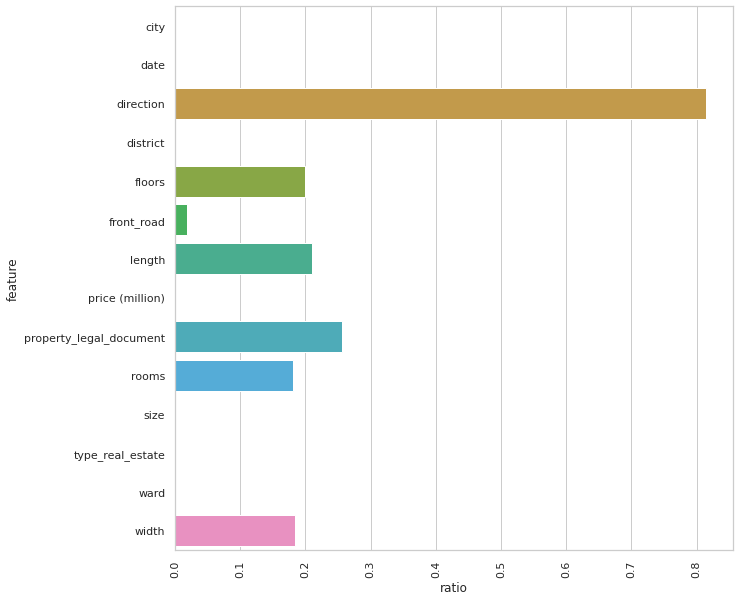

In [86]:
visualizing_missing_data(df)
